In [1]:
from geneticalgorithm2 import *

In [2]:
not_nan

,flag,lat_index,lon_index
0,r,0,60
1,r,0,61
2,r,0,62
3,r,0,63
4,r,0,64
...,...,...,...
29062,r,386,80
29068,r,387,80
29069,r,387,81
29076,r,388,80


generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

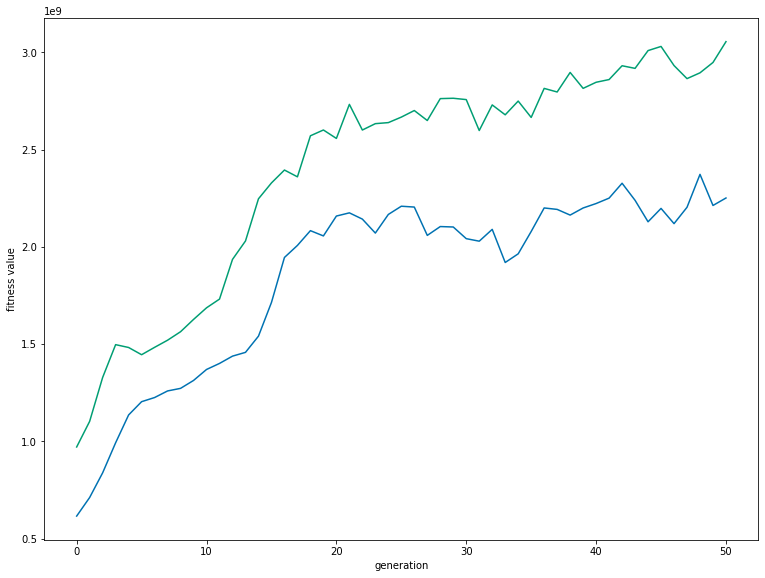

In [3]:
number_generations = 50
population_size = 100
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-14/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend()
plt.savefig('figures/ga-convergence-14.png')

In [4]:
chrom_best

array([[17841., 25662., 25695., ..., 16599.,  9840.,  5245.],
       [ 1692.,  7355., 12239., ..., 12828.,  6770.,  3124.],
       [ 5067., 13140., 17841., ..., 10224., 26701., 26167.],
       ...,
       [ 2785.,  5615., 10405., ..., 21614., 22878., 24167.],
       [ 5968.,  3279.,  4598., ..., 17841., 21614.,  3229.],
       [ 4598.,  9168., 10825., ...,  3229., 21616., 24320.]])

In [6]:
df = pandas.read_csv('data/processed/ga-results-14/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,4598,r,47,82
1,9168,r,72,172
2,10825,r,80,185
3,11754,r,85,185
4,12538,r,90,190
5,13761,r,99,174
6,10027,r,76,185
7,14183,r,103,184
8,16793,r,127,115
9,726,r,15,84


In [7]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10

In [8]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-14.nc')

In [20]:
ds = xr.open_dataset('data/processed/ga-14.nc')

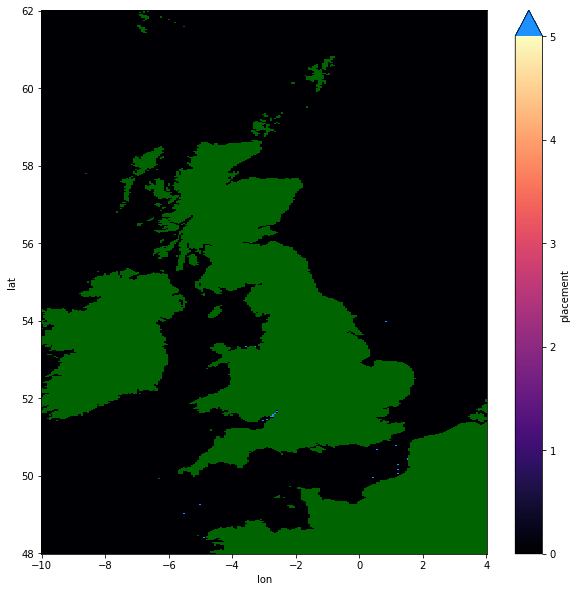

In [21]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

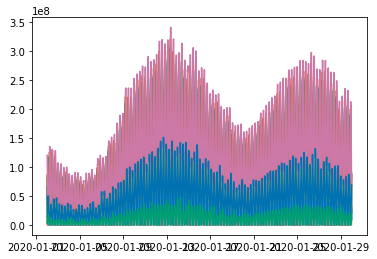

In [22]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    

# plt.legend()
    

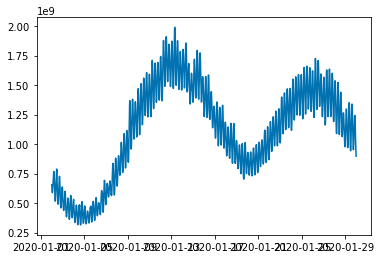

In [23]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [24]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

3055462873.6885314

In [25]:
f_best[-1]

3055462873.6885314

In [ ]:
#######

In [11]:
ds_range_mean = xr.open_dataset('data/processed/range-mean-power2.nc')

In [12]:
n = 20
av_range = ds_range_mean.power.values
max_idx = np.zeros((n,2),dtype=int)
for i in range(n):
    av_max = np.max(av_range[av_range>0])
    max_idx[i,0] = np.where(av_range==av_max)[0][0]
    max_idx[i,1] = np.where(av_range==av_max)[1][0]
    av_range[max_idx[i,0],max_idx[i,1]] = np.nan


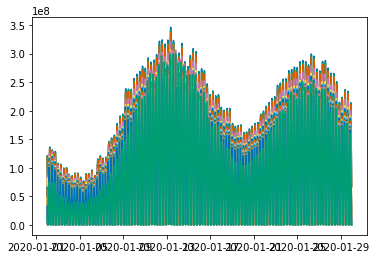

In [13]:
sol_power = 0
plt.figure()
for i in range(max_idx.shape[0]):
    curve = r_power[:,max_idx[i,0],max_idx[i,1]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'r,{max_idx[i]}')
    
# plt.legend()

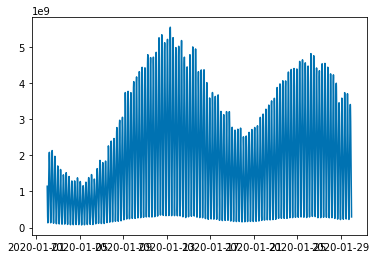

In [14]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [15]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

2467915333.8244367

In [16]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values

for j in range(max_idx.shape[0]):
    uk[max_idx[j,0],max_idx[j,1]] = 10
    


In [17]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-theo-range.nc')

In [18]:
ds = xr.open_dataset('data/processed/ga-theo-range.nc')

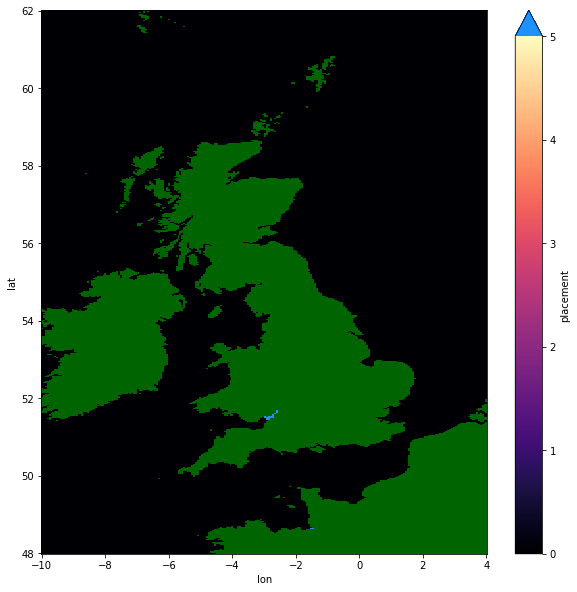

In [19]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

In [ ]:
#######

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

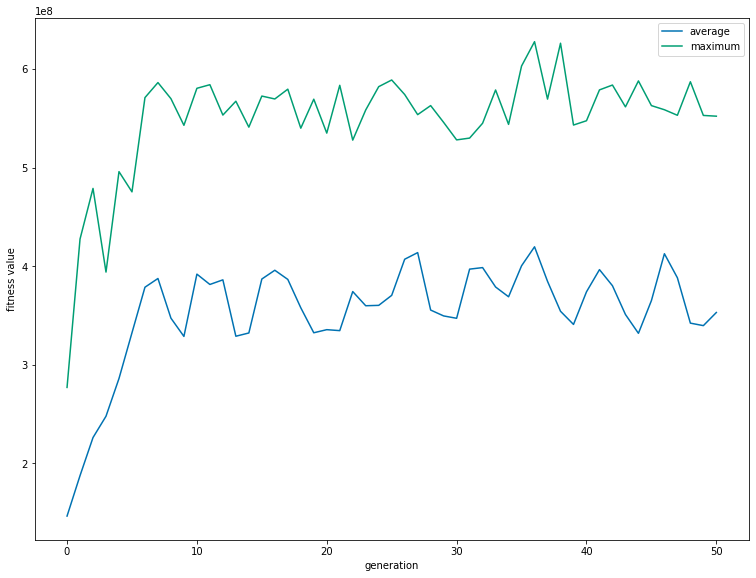

In [26]:
number_generations = 50
population_size = 100
chromosome_length = 5

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-15/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend()
plt.savefig('figures/ga-convergence-15.png')

In [27]:
df = pandas.read_csv('data/processed/ga-results-15/gen-50.csv')


ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10

In [28]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-15.nc')

In [29]:
ds = xr.open_dataset('data/processed/ga-15.nc')

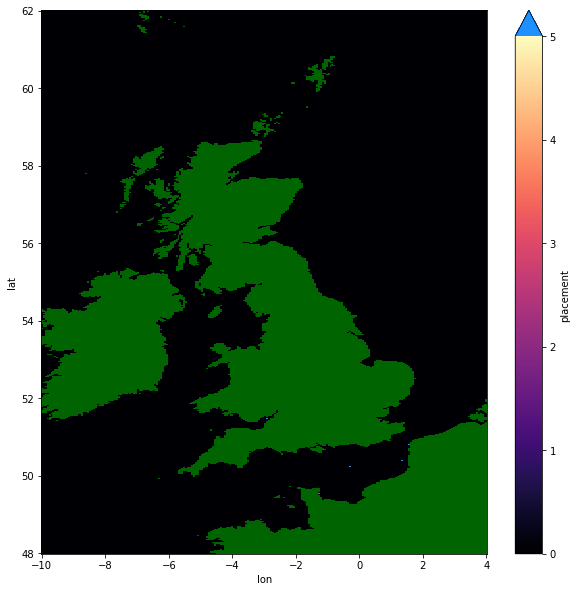

In [30]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

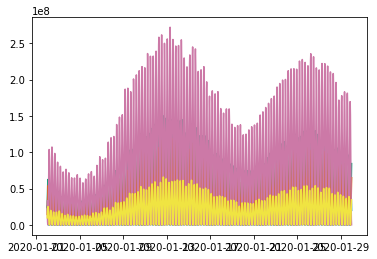

In [31]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    

# plt.legend()

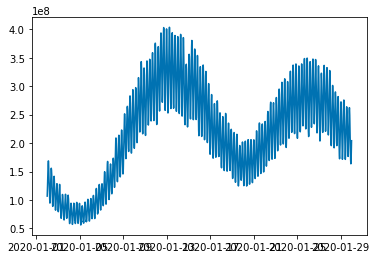

In [32]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [33]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

552325352.8960825

In [34]:
f_best[-1]

552325352.8960825

In [ ]:
#######